# Data validation of walking time and distance

These are initial settings of Python and notebook.  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns


//anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
%matplotlib inline

In [5]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
plt.style.use("ggplot")

## We use "output_3-1-2016.csv" data to start with

## df_stop is the dataframe for but stops, and df_031 is the dataframe for address value data.

In [7]:
df_stops = pd.read_csv("stops.csv")

In [7]:
df_031 = pd.read_csv("output_3-1-2016.csv")

In [8]:
df_031.describe()

,Unnamed: 0,address_latitude,address_longitude,stop_latitude,stop_longitude,distance,time
count,131565.00000,131565.000000,131565.000000,131565.000000,131565.000000,131565.000000,131565.000000
mean,65782.00000,41.478983,-81.579900,41.479297,-81.579801,575.478387,415.137689
std,37979.68842,0.029704,0.046505,0.029331,0.046520,535.155975,385.699205
min,0.00000,41.427883,-81.660000,41.408959,-81.665767,0.000000,0.000000
25%,32891.00000,41.453083,-81.620400,41.452808,-81.620184,249.000000,180.000000
50%,65782.00000,41.478983,-81.579900,41.478906,-81.580195,423.000000,305.000000
75%,98673.00000,41.504883,-81.539400,41.503476,-81.536512,699.000000,504.000000
max,131564.00000,41.530083,-81.499800,41.539155,-81.492388,4801.000000,3457.000000


In [9]:
df_031.head()

,Unnamed: 0,address_latitude,address_longitude,stop_latitude,stop_longitude,distance,time
0,0,41.427883,-81.66,41.446877,-81.658588,2425,1748
1,1,41.427883,-81.66,41.447112,-81.659555,2505,1806
2,2,41.427883,-81.66,41.446992,-81.662701,2768,1996
3,3,41.427883,-81.66,41.446953,-81.657015,2295,1654
4,4,41.427883,-81.66,41.447113,-81.657469,2330,1680


## I made a function to calculate direct distance of two given poitns.

In [10]:

from geopy.distance import vincenty

def getDirectDistance(origin_lat, origin_lon, destination_lat, destinationa_lon):
    origin = (origin_lon, origin_lat)
    destination = (destination_lon, destination_lat)
    return (vincenty(origin, destination).miles)

## And added direct distance value to the df_031 dataframe.

In [11]:
for i in range (len(df_031)):
    df_031.loc[i,'direct_distance']= getDirectDistance(df_031.loc[i, 'address_latitude'], df_031.loc[i, 'address_longitude'],df_031.loc[i, 'stop_latitude'], df_031.loc[i, 'stop_longitude'])



NameError: name 'destination_lon' is not defined

In [11]:
df_031.head()

,Unnamed: 0,address_latitude,address_longitude,stop_latitude,stop_longitude,distance,time,direct_distance
0,0,41.427883,-81.66,41.446877,-81.658588,2425,1748,0.214851
1,1,41.427883,-81.66,41.447112,-81.659555,2505,1806,0.196012
2,2,41.427883,-81.66,41.446992,-81.662701,2768,1996,0.268539
3,3,41.427883,-81.66,41.446953,-81.657015,2295,1654,0.282422
4,4,41.427883,-81.66,41.447113,-81.657469,2330,1680,0.261389


##  Since walking distances in the dataframe are written in meters, I converted them to miles

In [13]:
df_031['walking_distance_mile']= df_031.distance/5280

In [14]:
df_031.head()

,Unnamed: 0,address_latitude,address_longitude,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile
0,0,41.427883,-81.66,41.446877,-81.658588,2425,1748,0.214851,0.459280
1,1,41.427883,-81.66,41.447112,-81.659555,2505,1806,0.196012,0.474432
2,2,41.427883,-81.66,41.446992,-81.662701,2768,1996,0.268539,0.524242
3,3,41.427883,-81.66,41.446953,-81.657015,2295,1654,0.282422,0.434659
4,4,41.427883,-81.66,41.447113,-81.657469,2330,1680,0.261389,0.441288


## plotting walking distance vs direct distance

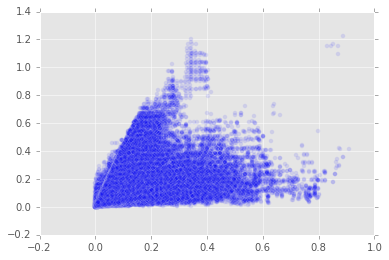

In [19]:
plt.scatter(df_031.walking_distance_mile, df_031.direct_distance, alpha =0.1)

##  And save the intermediate data to CSV

In [17]:
df_031.to_csv('distance_added_to_030116.csv')

## Change the index to latitude and longitude 

In [22]:
df_031 = df_031.set_index(['address_latitude', 'address_longitude'])

In [24]:
df_031.tail()

Unnamed: 0  stop_latitude  stop_longitude  \
address_latitude address_longitude                                              
41.530083        -81.4998               131560      41.530765      -81.497331   
                 -81.4998               131561      41.529055      -81.497339   
                 -81.4998               131562      41.529868      -81.497005   
                 -81.4998               131563      41.527678      -81.497342   
                 -81.4998               131564      41.527677      -81.496998   

                                    distance  time  direct_distance  \
address_latitude address_longitude                                    
41.530083        -81.4998                307   223         0.171462   
                 -81.4998                355   256         0.171089   
                 -81.4998                235   169         0.193952   
                 -81.4998                479   345         0.172331   
                 -81.4998                479   345         0.195986   

                                    walking_distance_mile  
address_latitude address_longitude                         
41.530083        -81.4998                        0.058144  
                 -81.4998                        0.067235  
                 -81.4998                        0.044508  
                 -81.4998                        0.090720  
                 -81.4998                        0.090720

## walking sinousity = (actual walking distance) / (direct distance)

In [25]:
df_031['walking_sinuosity']=df_031.walking_distance_mile/df_031.direct_distance

In [31]:
df_s.sort_values('time')


Unnamed: 0  stop_latitude  stop_longitude  \
address_latitude address_longitude                                              
41.427883        -81.66                      3      41.446953      -81.657015   
                 -81.66                      4      41.447113      -81.657469   
                 -81.66                      0      41.446877      -81.658588   
                 -81.66                      1      41.447112      -81.659555   
                 -81.66                      2      41.446992      -81.662701   

                                    distance  time  direct_distance  \
address_latitude address_longitude                                    
41.427883        -81.66                 2295  1654         0.282422   
                 -81.66                 2330  1680         0.261389   
                 -81.66                 2425  1748         0.214851   
                 -81.66                 2505  1806         0.196012   
                 -81.66                 2768  1996         0.268539   

                                    walking_distance_mile  walking_sinuosity  
address_latitude address_longitude                                            
41.427883        -81.66                          0.434659           1.539040  
                 -81.66                          0.441288           1.688245  
                 -81.66                          0.459280           2.137670  
                 -81.66                          0.474432           2.420417  
                 -81.66                          0.524242           1.952202

for g in range(len(df_s)/5):
    df = df_s[i:(i+5)]
    df = df.sortvalue
    for i in range(5):
        
df.groupby('group')['value'].rank(ascending=False)


546
down vote
df = df.rename(columns={'$a': 'a', '$b': 'b'})

In [32]:
df_031 = df_031.rename(columns={'Unnamed: 0':'serial'})

In [34]:
df_031.to_csv("030116_distance_sinuosity.csv")

In [8]:
df = pd.read_csv("030116_distance_sinuosity.csv")

In [9]:
df["walking_rank"] = df.groupby(["address_latitude","address_longitude"])["time"].rank()

In [10]:
df.head()

,address_latitude,address_longitude,serial,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile,walking_sinuosity,walking_rank
0,41.427883,-81.66,0,41.446877,-81.658588,2425,1748,0.214851,0.459280,2.137670,3
1,41.427883,-81.66,1,41.447112,-81.659555,2505,1806,0.196012,0.474432,2.420417,4
2,41.427883,-81.66,2,41.446992,-81.662701,2768,1996,0.268539,0.524242,1.952202,5
3,41.427883,-81.66,3,41.446953,-81.657015,2295,1654,0.282422,0.434659,1.539040,1
4,41.427883,-81.66,4,41.447113,-81.657469,2330,1680,0.261389,0.441288,1.688245,2


In [11]:
df.describe()

,address_latitude,address_longitude,serial,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile,walking_sinuosity,walking_rank
count,131565.000000,131565.000000,131565.00000,131565.000000,131565.000000,131565.000000,131565.000000,131565.000000,131565.000000,131565.000000,131565.000000
mean,41.478983,-81.579900,65782.00000,41.479297,-81.579801,575.478387,415.137689,0.156225,0.108992,1.006822,3.000000
std,0.029704,0.046505,37979.68842,0.029331,0.046520,535.155975,385.699205,0.124331,0.101355,1.238670,1.404085
min,41.427883,-81.660000,0.00000,41.408959,-81.665767,0.000000,0.000000,0.000389,0.000000,0.000000,1.000000
25%,41.453083,-81.620400,32891.00000,41.452808,-81.620184,249.000000,180.000000,0.065780,0.047159,0.348961,2.000000
50%,41.478983,-81.579900,65782.00000,41.478906,-81.580195,423.000000,305.000000,0.125775,0.080114,0.586815,3.000000
75%,41.504883,-81.539400,98673.00000,41.503476,-81.536512,699.000000,504.000000,0.211574,0.132386,1.212338,4.000000
max,41.530083,-81.499800,131564.00000,41.539155,-81.492388,4801.000000,3457.000000,1.228057,0.909280,64.770133,5.000000


In [12]:
df["direct_distance_rank"] = df.groupby(["address_latitude","address_longitude"])["direct_distance"].rank()

In [13]:
df.head()

,address_latitude,address_longitude,serial,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile,walking_sinuosity,walking_rank,direct_distance_rank
0,41.427883,-81.66,0,41.446877,-81.658588,2425,1748,0.214851,0.459280,2.137670,3,2
1,41.427883,-81.66,1,41.447112,-81.659555,2505,1806,0.196012,0.474432,2.420417,4,1
2,41.427883,-81.66,2,41.446992,-81.662701,2768,1996,0.268539,0.524242,1.952202,5,4
3,41.427883,-81.66,3,41.446953,-81.657015,2295,1654,0.282422,0.434659,1.539040,1,5
4,41.427883,-81.66,4,41.447113,-81.657469,2330,1680,0.261389,0.441288,1.688245,2,3


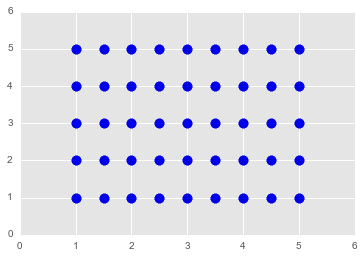

In [14]:
plt.scatter(df.walking_rank, df.direct_distance_rank, alpha = 0.01, s=100)

In [15]:
df.to_csv("030116_ranking_added.csv")

In [16]:
df[df.walking_rank ==1].describe()

,address_latitude,address_longitude,serial,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile,walking_sinuosity,walking_rank,direct_distance_rank
count,23918.000000,23918.000000,23918.000000,23918.000000,23918.000000,23918.000000,23918.000000,23918.000000,23918.000000,23918.000000,23918,23918.000000
mean,41.479405,-81.579696,66321.735597,41.479778,-81.579551,422.199933,304.505477,0.140338,0.079962,0.791004,1,2.539510
std,0.029682,0.046462,37951.134570,0.029288,0.046440,456.466130,329.059450,0.130787,0.086452,0.946567,0,1.455995
min,41.427883,-81.660000,3.000000,41.410795,-81.665614,0.000000,0.000000,0.000389,0.000000,0.000000,1,1.000000
25%,41.453783,-81.620400,33726.250000,41.453608,-81.620023,147.000000,106.000000,0.045992,0.027841,0.277981,1,1.000000
50%,41.479683,-81.579900,66679.500000,41.479192,-81.580581,294.000000,212.000000,0.098017,0.055682,0.455078,1,2.000000
75%,41.504883,-81.539400,99091.000000,41.503756,-81.536438,514.000000,371.000000,0.196502,0.097348,1.032820,1,4.000000
max,41.530083,-81.499800,131562.000000,41.539155,-81.496998,3992.000000,2876.000000,1.203565,0.756061,64.770133,1,5.000000


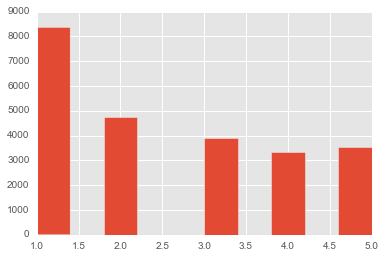

In [17]:
df[df.walking_rank ==1].direct_distance_rank.hist()

In [58]:
df.head()

,address_latitude,address_longitude,serial,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile,walking_sinuosity,walking_rank,direct_distance_rank
0,41.427883,-81.66,0,41.446877,-81.658588,2425,1748,0.214851,0.459280,2.137670,3,2
1,41.427883,-81.66,1,41.447112,-81.659555,2505,1806,0.196012,0.474432,2.420417,4,1
2,41.427883,-81.66,2,41.446992,-81.662701,2768,1996,0.268539,0.524242,1.952202,5,4
3,41.427883,-81.66,3,41.446953,-81.657015,2295,1654,0.282422,0.434659,1.539040,1,5
4,41.427883,-81.66,4,41.447113,-81.657469,2330,1680,0.261389,0.441288,1.688245,2,3


In [41]:
def dataframe_of_close_stops(given_lat, given_lon, df, given_range=0.007225):
    selectedDf = df[(df.stop_lat > (given_lat - given_range)) \
                    & (df.stop_lat < (given_lat + given_range))\
                    &(df.stop_lon > (given_lon - given_range)) \
                    & (df.stop_lon < (given_lon + given_range))]
    return selectedDf

In [42]:
def get_number_of_close_stops(given_lat, given_lon, df, given_range=0.007225):
    number = len(dataframe_of_close_stops(given_lat, given_lon, df, given_range))
    return number

In [20]:
def Add_distance_to_dataframe(addr_df, destination_lat, destination_lon):
    addr_df.index = range(0, len(addr_df))
    for i in range(len(addr_df)):
        addr_df.loc[i, "distance"] = vincenty((destination_lat, destination_lon), (addr_df.loc[i, "stop_lat"], addr_df.loc[i,"stop_lon"])).miles
    return addr_df

In [21]:
def get_distance_to_closest_bus_stop(given_lat, given_lon, df, given_range=0.007225):
    if not get_number_of_close_stops(given_lat, given_lon, df, given_range) == 0:
        close_stops_df = dataframe_of_close_stops(given_lat, given_lon, df, given_range)
        close_stops_plus_distance_df = Add_distance_to_dataframe(close_stops_df,given_lat, given_lon)
        return close_stops_plus_distance_df.loc[close_stops_plus_distance_df.distance == close_stops_plus_distance_df.distance.min()].distance
    else:
        return np.NaN

In [22]:
for i in range(len(df)):
    x= get_number_of_close_stops(df.address_latitude[i], df.address_longitude[i], df_stops)
    df.set_value(i, "surrounding_stops", x)

In [37]:
for i in range(len(df_stops)):
    x= get_number_of_close_stops(df_stops.stop_lat[i], df_stops.stop_lon[i], df_stops, given_range=0.00027367424)
    df_stops.set_value(i, "close_stops", x)

In [38]:
df_stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,close_stops
0,00001,NaN,COLUMBUS ST & BROADWAY,NaN,41.392864,-81.536557,NaN,NaN,0,NaN,2
1,00002,NaN,10800 BROOKPARK RD (HOME DEPOT),NaN,41.418556,-81.760788,NaN,NaN,0,NaN,1
2,00004,NaN,EUCLID AV & E 101ST ST,NaN,41.503712,-81.617399,NaN,NaN,0,NaN,2
3,00005,NaN,10081 W RIDGEWOOD DR,NaN,41.384525,-81.755926,NaN,NaN,0,NaN,1
4,00014,NaN,102 PROSPECT AV W,NaN,41.498030,-81.692012,NaN,NaN,0,NaN,2


In [39]:
df_stops.to_csv("042916_stops_close_stops.csv")

In [45]:
df_stops[df_stops.close_stops>=3].count()

stop_id           386
stop_code           0
stop_name         386
stop_desc           0
stop_lat          386
stop_lon          386
zone_id             0
stop_url            0
location_type     386
parent_station     32
close_stops       386
dtype: int64

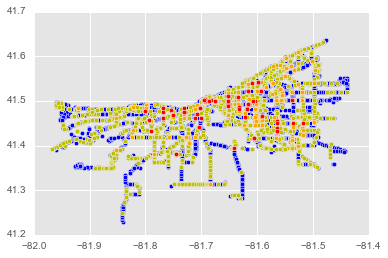

In [57]:
plt.scatter(df_stops.stop_lon, df_stops.stop_lat)
plt.scatter(df_stops[df_stops.close_stops>=2].stop_lon, df_stops[df_stops.close_stops>=2].stop_lat, c='y')
plt.scatter(df_stops[df_stops.close_stops>=3].stop_lon, df_stops[df_stops.close_stops>=3].stop_lat, c='orange')
plt.scatter(df_stops[df_stops.close_stops>=4].stop_lon, df_stops[df_stops.close_stops>=4].stop_lat, c='r')
plt.xlim(-82,-81.4)
plt.ylim(41.2, 41.7)
plt.savefig("close_bus_stops2.png")

In [40]:
df_stops.describe()

,stop_code,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,close_stops
count,0,0,6367.000000,6367.000000,0,0,6367.000000,6367.000000
mean,NaN,NaN,41.465099,-81.661435,NaN,NaN,0.007068,1.526465
std,NaN,NaN,0.065410,0.121885,NaN,NaN,0.083779,0.679729
min,NaN,NaN,41.227883,-81.967530,NaN,NaN,0.000000,1.000000
25%,NaN,NaN,41.424991,-81.748190,NaN,NaN,0.000000,1.000000
50%,NaN,NaN,41.467930,-81.638871,NaN,NaN,0.000000,1.000000
75%,NaN,NaN,41.503925,-81.563384,NaN,NaN,0.000000,2.000000
max,NaN,NaN,41.637051,-81.438542,NaN,NaN,1.000000,6.000000


In [65]:
get_number_of_close_stops(41.427883,-81.66, df_stops )

0

In [66]:
df.groupby(["walking_rank","direct_distance_rank"]).count()

address_latitude  address_longitude  \
walking_rank direct_distance_rank                                        
1.0          1                                 8364               8364   
             2                                 4749               4749   
             3                                 3895               3895   
             4                                 3357               3357   
             5                                 3553               3553   
1.5          1                                 1259               1259   
             2                                 1361               1361   
             3                                  751                751   
             4                                  813                813   
             5                                  524                524   
2.0          1                                 4477               4477   
             2                                 6876               6876   
             3                                 4073               4073   
             4                                 4714               4714   
             5                                 2824               2824   
2.5          1                                  346                346   
             2                                  474                474   
             3                                  510                510   
             4                                  467                467   
             5                                  267                267   
3.0          1                                 3389               3389   
             2                                 4008               4008   
             3                                 7464               7464   
             4                                 4372               4372   
             5                                 4247               4247   
3.5          1                                  481                481   
             2                                  686                686   
             3                                  865                865   
             4                                 1009               1009   
             5                                  459                459   
4.0          1                                 3257               3257   
             2                                 4451               4451   
             3                                 4080               4080   
             4                                 6897               6897   
             5                                 4398               4398   
4.5          1                                  612                612   
             2                                  690                690   
             3                                  606                606   
             4                                  763                763   
             5                                  599                599   
5.0          1                                 4128               4128   
             2                                 3018               3018   
             3                                 4069               4069   
             4                                 3921               3921   
             5                                 9442               9442   

                                   serial  stop_latitude  stop_longitude  \
walking_rank direct_distance_rank                                          
1.0          1                       8364           8364            8364   
             2                       4749           4749            4749   
             3                       3895           3895            3895   
             4                       3357           3357            3357   
             5                       3553           3553            3553   
1.5          1          

In [67]:
df[df.walking_rank==4.5]

,address_latitude,address_longitude,serial,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile,walking_sinuosity,walking_rank,direct_distance_rank,surrounding_stops
300,41.427883,-81.6060,300,41.430093,-81.600663,1683,1212,0.371003,0.318750,0.859158,4.5,3,9
301,41.427883,-81.6060,301,41.430128,-81.600564,1683,1212,0.377881,0.318750,0.843519,4.5,5,9
310,41.427883,-81.6042,310,41.430093,-81.600663,1474,1062,0.246447,0.279167,1.132766,4.5,1,13
311,41.427883,-81.6042,311,41.430128,-81.600564,1474,1062,0.253320,0.279167,1.102030,4.5,2,13
315,41.427883,-81.6033,315,41.430093,-81.600663,1367,984,0.184343,0.258902,1.404453,4.5,1,11
316,41.427883,-81.6033,316,41.430128,-81.600564,1366,984,0.191206,0.258712,1.353057,4.5,2,11
320,41.427883,-81.6024,320,41.430093,-81.600663,1316,947,0.122592,0.249242,2.033110,4.5,1,9
321,41.427883,-81.6024,321,41.430128,-81.600564,1315,947,0.129414,0.249053,1.924474,4.5,2,9
330,41.427883,-81.6006,330,41.430093,-81.600663,547,394,0.022826,0.103598,4.538683,4.5,1,11
331,41.427883,-81.6006,331,41.430128,-81.600564,547,394,0.022895,0.103598,4.524984,4.5,2,11


In [68]:
df_g = df.groupby(["walking_rank","direct_distance_rank"]).count()

In [90]:
df_g.to_csv('031616_groupby.csv')

In [91]:
df2 = pd.read_csv('031616_groupby.csv')

In [93]:
df2.head()

,walking_rank,direct_distance_rank,address_latitude,address_longitude,serial,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile,walking_sinuosity,surrounding_stops
0,1,1,8364,8364,8364,8364,8364,8364,8364,8364,8364,8364,8364
1,1,2,4749,4749,4749,4749,4749,4749,4749,4749,4749,4749,4749
2,1,3,3895,3895,3895,3895,3895,3895,3895,3895,3895,3895,3895
3,1,4,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357,3357
4,1,5,3553,3553,3553,3553,3553,3553,3553,3553,3553,3553,3553


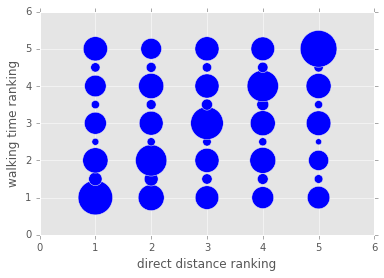

In [158]:
plt.scatter(df2.direct_distance_rank,df2.walking_rank, s = df2.serial/7)
plt.xlabel("direct distance ranking")
plt.ylabel("walking time ranking")
plt.savefig("walking_direct.png")

In [136]:
df_g.index.values[:][:]


array([(1.0, 1.0), (1.0, 2.0), (1.0, 3.0), (1.0, 4.0), (1.0, 5.0),
       (1.5, 1.0), (1.5, 2.0), (1.5, 3.0), (1.5, 4.0), (1.5, 5.0),
       (2.0, 1.0), (2.0, 2.0), (2.0, 3.0), (2.0, 4.0), (2.0, 5.0),
       (2.5, 1.0), (2.5, 2.0), (2.5, 3.0), (2.5, 4.0), (2.5, 5.0),
       (3.0, 1.0), (3.0, 2.0), (3.0, 3.0), (3.0, 4.0), (3.0, 5.0),
       (3.5, 1.0), (3.5, 2.0), (3.5, 3.0), (3.5, 4.0), (3.5, 5.0),
       (4.0, 1.0), (4.0, 2.0), (4.0, 3.0), (4.0, 4.0), (4.0, 5.0),
       (4.5, 1.0), (4.5, 2.0), (4.5, 3.0), (4.5, 4.0), (4.5, 5.0),
       (5.0, 1.0), (5.0, 2.0), (5.0, 3.0), (5.0, 4.0), (5.0, 5.0)], dtype=object)

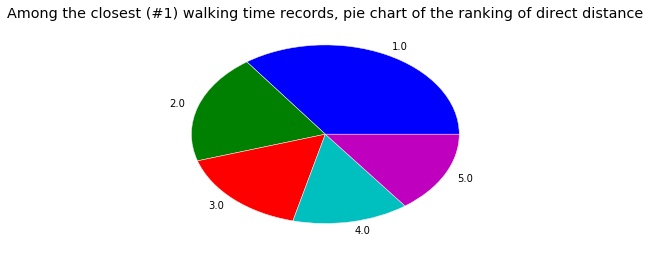

In [159]:
df1 = df2[df2.walking_rank==1]
plt.pie(df1.serial, labels = df1.direct_distance_rank)
plt.title("Among the closest (#1) walking time records, pie chart of the ranking of direct distance")
plt.savefig("piechart.png")

In [140]:
df5 = df2[df2.walking_rank==5]
df5

,walking_rank,direct_distance_rank,address_latitude,address_longitude,serial,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile,walking_sinuosity,surrounding_stops
40,5,1,4128,4128,4128,4128,4128,4128,4128,4128,4128,4128,4128
41,5,2,3018,3018,3018,3018,3018,3018,3018,3018,3018,3018,3018
42,5,3,4069,4069,4069,4069,4069,4069,4069,4069,4069,4069,4069
43,5,4,3921,3921,3921,3921,3921,3921,3921,3921,3921,3921,3921
44,5,5,9442,9442,9442,9442,9442,9442,9442,9442,9442,9442,9442


([<matplotlib.patches.Wedge at 0x11bb08470>,
  <matplotlib.text.Text at 0x11ca6af60>])

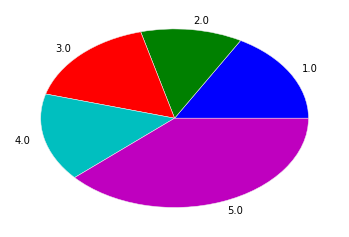

In [142]:
plt.pie(df5.serial, labels = df5.direct_distance_rank)

In [147]:
dfb = df[(df.walking_rank ==1)|(df.walking_rank==1.5)]

In [148]:
dfb.head()

,address_latitude,address_longitude,serial,stop_latitude,stop_longitude,distance,time,direct_distance,walking_distance_mile,walking_sinuosity,walking_rank,direct_distance_rank,surrounding_stops
3,41.427883,-81.6600,3,41.446953,-81.657015,2295,1654,0.282422,0.434659,1.539040,1,5,0
6,41.427883,-81.6591,6,41.446953,-81.657015,2232,1608,0.240409,0.422727,1.758368,1,5,0
11,41.427883,-81.6582,11,41.446953,-81.657015,2214,1595,0.208879,0.419318,2.007469,1,4,0
16,41.427883,-81.6573,16,41.446953,-81.657015,2195,1582,0.193040,0.415720,2.153541,1,1,0
20,41.427883,-81.6564,20,41.446953,-81.657015,2177,1569,0.196719,0.412311,2.095936,1,1,0


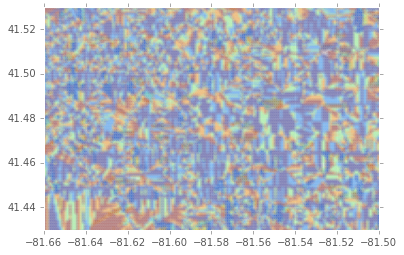

In [160]:
plt.scatter(dfb.address_longitude, dfb.address_latitude, c=dfb.direct_distance_rank,alpha =0.1)
plt.xlim(-81.66, -81.5)
plt.ylim(41.43,41.53)
plt.savefig("rank_heatmap_.png")